# **Subject: Data Mining** #

Name: Nguyễn Hoàng Trung Kiên

Student's ID: 22127478

Last modified: 8/11/2024

# Lab 01: Data Preprocessing

### Self evaluation:

| Tasks | Completeness |
|----------|----------|
| Data cleaning  | 100%  |
| Feature selection  | 100%  |
| Data normalization  | 100%  |
| Data discretization  | 100%  |

### Import dataset:

In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Ping\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

### Import libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Combine data features with target

In [4]:
df = [X, y]
data = pd.concat(df, axis=1)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## 1. Data cleaning:

### 1.1. Assessment of Missing Data

#### Missing data of each columns by percentage: ####

In [5]:
def check_missing_data(data):
    missing_data = {}
    
    for col in data:
        empty_val = 0
        for value in data[col]:
            if value == "?" or value != value:  
                empty_val += 1
        missing_data[col] = empty_val / len(data[col]) * 100
    return missing_data    

missing_data = check_missing_data(data)
for k, v in missing_data.items():
    print(f'{k}: {v} %')

age: 0.0 %
workclass: 5.7307235575938735 %
fnlwgt: 0.0 %
education: 0.0 %
education-num: 0.0 %
marital-status: 0.0 %
occupation: 5.751197739650301 %
relationship: 0.0 %
race: 0.0 %
sex: 0.0 %
capital-gain: 0.0 %
capital-loss: 0.0 %
hours-per-week: 0.0 %
native-country: 1.7546374022357807 %
income: 0.0 %


#### Is there any missing data present? If so, what actions should be taken and why? ####

- **Answer:** In the above dictionaries, three columns contain missing data: **workclass**, **occupation**, and **native-country**

#### Should the affected records be excluded from the dataset? ####

- **Answer:** No, because the percentage of missing value in each column is low.

#### Should the missing values be imputed? If so, which imputation methods will be applied (e.g., global constant, mean, etc.)? ####

- **Answer:** I plan to handle the missing data by filling the missing values with **Mode of each columns** since they are categorical variables and the percentage of missing value in the dataset is quite low so it won't be affected much.

In [6]:
def fill_in_mode(data):
    for column in data:
        values, counts = np.unique([val for val in data[column] if val == val], return_counts=True)
        mode_value = values[np.argmax(counts)]
        
        data[column] = np.where((data[column] == "?") | (data[column].isna()), mode_value, data[column])

fill_in_mode(data)

#### Check the missing value again ####

In [7]:
missing_data = check_missing_data(data)
for k, v in missing_data.items():
    print(f'{k}: {v} %')

age: 0.0 %
workclass: 0.0 %
fnlwgt: 0.0 %
education: 0.0 %
education-num: 0.0 %
marital-status: 0.0 %
occupation: 0.0 %
relationship: 0.0 %
race: 0.0 %
sex: 0.0 %
capital-gain: 0.0 %
capital-loss: 0.0 %
hours-per-week: 0.0 %
native-country: 0.0 %
income: 0.0 %


### 1.2. Identification of Duplicate Records

####  Are there any duplicate records present in dataset? If duplicates exist, keep only one of them. ####

In [8]:
dup_count = 0
for is_duplicate in data.duplicated():
    if is_duplicate:
        dup_count += 1

print(dup_count)

29


There are 29 duplicate rows.

- Data length

In [9]:
len(data)

48842

- Remove duplicates

In [10]:
data = data.drop_duplicates()

- Data length after removing duplicates

In [11]:
len(data)

48813

### 1.3. Additional data cleaning methods

#### Are there any further steps, methods that can be implemented to make the data to be more cleaner? ####

- **Answer:** Handle wrong format data.

In the **income** column, some rows have the "**.**" after the main value, I will check for this.

In [12]:
unique_values = list(set(data['income']))  
print(f"Distinct values in '{'income'}': {unique_values}")

Distinct values in 'income': ['<=50K.', '<=50K', '>50K.', '>50K']


It is true that some row has the dot after the main string, so I will remove this dot.

In [13]:
data = data.copy()
data['income'] = [x[:-1] if x[-1] == '.' else x for x in data['income']]

#### The data after data cleaning: ####

In [14]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## 2. Dimensionality Reduction:

#### Which features (attributes) are the most informative in the data? Why? Which features should be kept in the dataset? ####

Are there any features that are redundant or highly correlated with others? If so, which methods (e.g., correlation thresholding, Variance Inflation Factor) will be used
to eliminate these features?

- **Answer:** Yes, there is (the answer is shown below). Using correlation thresholding to eliminate these features. But for nominal feature, I'll use **Chi-squared** and **Cramer's V** to calculate the correlation, numeric feature I'll just normally calculate correlation using ```pd.corr()```

### 2.1. Nominal data:

- Why using Cramer's V? 

In statistics, **Cramér's V** is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on **Pearson's chi-squared statistic**. [[1](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)]

#### Calculate Chi-Squared: ####

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

Where:
- $O_i$ is the observed frequency in category $i$,
- $E_i$ is the expected frequency in category $i$.

In [15]:
def chi_squared(observed):
    total = np.sum(observed)
    row_sums = np.sum(observed, axis=1, keepdims=True)
    col_sums = np.sum(observed, axis=0, keepdims=True)
    expected = (row_sums @ col_sums) / total
    chi_squared = np.sum((observed - expected) ** 2 / expected)
    return chi_squared

def create_contingency_table(data, feature, target):
    unique_feature_values = list(set(data[feature]))
    unique_target_values = list(set(data[target]))
    
    table = np.zeros((len(unique_feature_values), len(unique_target_values)), dtype=int)
    feature_to_index = {val: idx for idx, val in enumerate(unique_feature_values)}
    target_to_index = {val: idx for idx, val in enumerate(unique_target_values)}
    for f, t in zip(data[feature], data[target]):
        row = feature_to_index[f]
        col = target_to_index[t]
        table[row][col] += 1
    return table

#### Calculate Cramer's V value: ####

$$
V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}}
$$

Where:
- $ \chi^2 $ is the Chi-Squared statistic,
- $ n $ is the total sample size,
- $ k $ is the number of categories in the first variable,
- $ r $ is the number of categories in the second variable

In [16]:
def cramers_v(observed):
    chi2 = chi_squared(observed)
    n = np.sum(observed)
    phi = chi2 / n
    r, k = observed.shape
    return np.sqrt(phi / min(k - 1, r - 1))

def calculate_cramers_v_matrix(data, features, threshold):
    n = len(features)
    cramers_v_matrix = np.zeros((n, n))
    
    for i, feature1 in enumerate(features):
        for j, feature2 in enumerate(features):
            if i == j:
                cramers_v_matrix[i][j] = 1 
            elif i < j:
                contingency_table = create_contingency_table(data, feature1, feature2)
                cramers_v_value = cramers_v(contingency_table)
                cramers_v_matrix[i][j] = cramers_v_value
                cramers_v_matrix[j][i] = cramers_v_value  

    return cramers_v_matrix

#### Plot the correlation matrix: ####

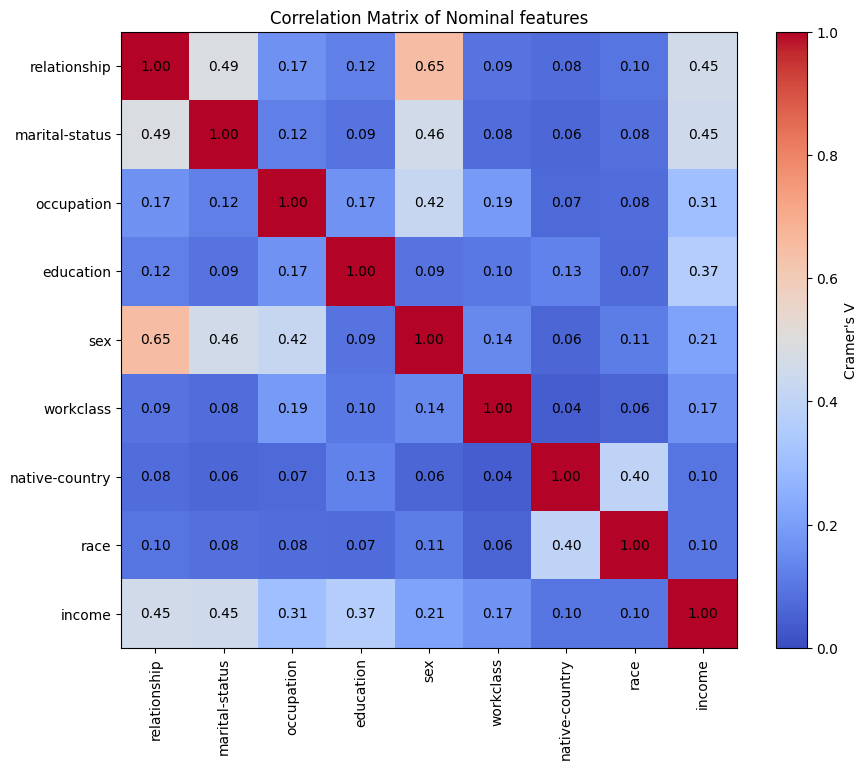

In [17]:
feature_names = ['relationship', 'marital-status', 'occupation', 'education', 'sex', 'workclass', 'native-country', 'race', 'income']
threshold = 0.2
cramers_v_matrix = calculate_cramers_v_matrix(data, feature_names, threshold)
plt.figure(figsize=(10, 8))
plt.imshow(cramers_v_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label="Cramer's V")

plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.yticks(range(len(feature_names)), feature_names)

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f"{cramers_v_matrix[i, j]:.2f}", ha="center", va="center", color="black")

plt.title("Correlation Matrix of Nominal features")
plt.show()

From the correlation matrix, I can observe that feature **sex** and **relationship** have strong correlation. Since **relationship** correlates with the target than **sex** does, I'll remove feature **sex** from the dataset. 

In [18]:
del data['sex']
feature_names.remove('sex')

Since the correlation of each features to the target variable is quite low, I choose $threshold = 0.2$, means that the result is weak. Although the result is statistically significant, the fields are only weakly associated.[[2](https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v)]

#### Calculate the Cramer's V value between each features with the target (income): ####

In [19]:
target_cramers_v_values = []
threshold = 0.2
for feature in feature_names:
    if feature != 'income':  
        contingency_table = create_contingency_table(data, feature, 'income')
        cramers_v_value = cramers_v(contingency_table)
        target_cramers_v_values.append((feature, cramers_v_value))
        print(f"Cramer's V between '{feature}' and 'income': {cramers_v_value:.4f}")
        if cramers_v_value >= threshold:
            print('Above threshold')
        else:
            print('Below threshold')

Cramer's V between 'relationship' and 'income': 0.4544
Above threshold
Cramer's V between 'marital-status' and 'income': 0.4482
Above threshold
Cramer's V between 'occupation' and 'income': 0.3080
Above threshold
Cramer's V between 'education' and 'income': 0.3660
Above threshold
Cramer's V between 'workclass' and 'income': 0.1690
Below threshold
Cramer's V between 'native-country' and 'income': 0.0960
Below threshold
Cramer's V between 'race' and 'income': 0.0999
Below threshold


I will select the features that are above the threshold since they have strong correlation with the target variable (income). The unimportant feature (less correlation) will be removed.

In [20]:
del data['workclass']
del data['native-country']
del data['race']

In the **education-num** column, each value corresponds to a specific level in the **education** column. To verify this relationship, I created a dictionary where each key represents a unique **education** value. The corresponding value for each key is a list that stores the associated **education-num** values. If the list contains only one element, it confirms that the relationship between **education** and **education-num** is accurate.

In [21]:
education_dict = {}

for edu, edu_num in zip(data['education'], data['education-num']):
    if edu not in education_dict:
        education_dict[edu] = []  
    if edu_num not in education_dict[edu]:
        education_dict[edu].append(edu_num)  

for education, nums in education_dict.items():
    print(f"{education}: {nums}")

Bachelors: [13]
HS-grad: [9]
11th: [7]
Masters: [14]
9th: [5]
Some-college: [10]
Assoc-acdm: [12]
Assoc-voc: [11]
7th-8th: [4]
Doctorate: [16]
Prof-school: [15]
5th-6th: [3]
10th: [6]
1st-4th: [2]
Preschool: [1]
12th: [8]


From the result, we can see that there is only one element in list following each keys, so it means **education-num** is the numeric representation of the **education** column, it means **multicollineary** may happen, so I will check if it's true.

#### Check if multicollineary occurs: ####

In [22]:
contingency_table = create_contingency_table(data, 'education', 'education-num')
cramers_v_value = cramers_v(contingency_table)
print(f"Cramer's V = {cramers_v_value:.4f}")

Cramer's V = 1.0000


Their Cramer's V correlation value is = 1, it means multicollineary occurs, so I will remove **education** column.

In [23]:
del data['education-num']

In [24]:
data

,age,fnlwgt,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income
0,39,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,0,40,<=50K
1,50,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,0,13,<=50K
2,38,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,0,40,<=50K
3,53,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,<=50K
4,28,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,0,0,36,<=50K
48838,64,321403,HS-grad,Widowed,Prof-specialty,Other-relative,0,0,40,<=50K
48839,38,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,0,0,50,<=50K
48840,44,83891,Bachelors,Divorced,Adm-clerical,Own-child,5455,0,40,<=50K


### 2.2. Numeric data:

#### Calculate correlation: ####

In [25]:
num_df = data[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']].copy()
num_df['income'] = np.where(data['income'] == '>50K', 1, 0)
correlation_matrix = num_df.corr()

#### Plot the correlation matrix ####

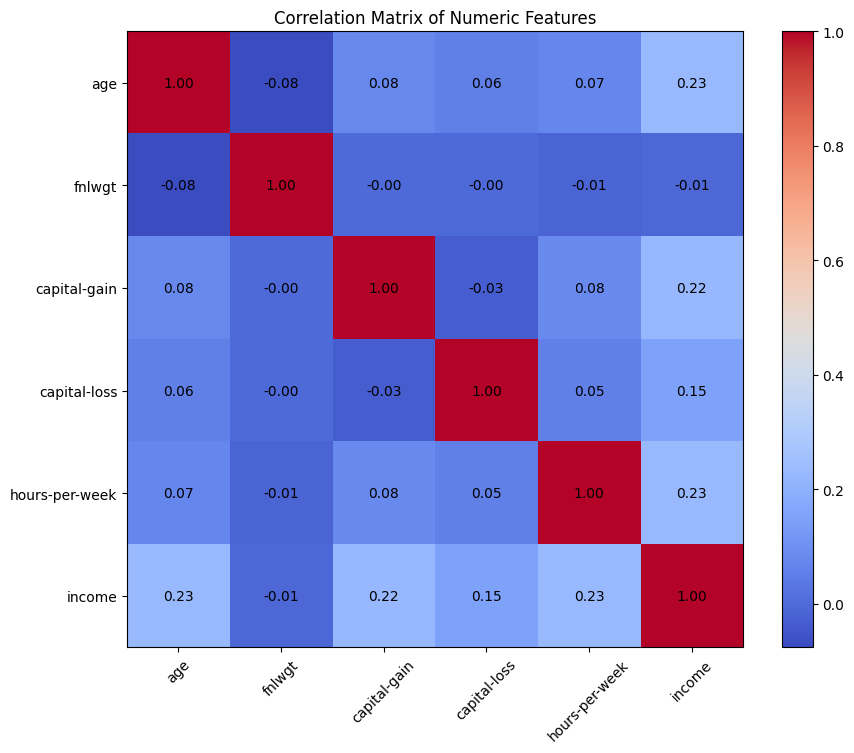

In [26]:
plt.figure(figsize=(10, 8))
cax = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(cax)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


There are no features strongly correlate to each other.

Since the correlation of each features to the target variable is quite low, I choose $threshold = 0.2$, same as the nominal features.

In [27]:
columns = list(correlation_matrix.columns)
threshold = 0.2
for column in columns:
    if column != 'income':
        print(f"Correlation of {column} with income_encoded: {correlation_matrix[column]['income']:.2f}")
        if correlation_matrix[column]['income'] >= threshold:
            print('Above threshold')
        else:
            print('Below threshold')
        

Correlation of age with income_encoded: 0.23
Above threshold
Correlation of fnlwgt with income_encoded: -0.01
Below threshold
Correlation of capital-gain with income_encoded: 0.22
Above threshold
Correlation of capital-loss with income_encoded: 0.15
Below threshold
Correlation of hours-per-week with income_encoded: 0.23
Above threshold


I will select the features that are above the threshold since they have strong correlation with the target variable (income). The unimportant feature (less correlation) will be removed.

In [28]:
del data['fnlwgt']
del data['capital-loss']

#### The data after feature selection: ####

In [29]:
data

,age,education,marital-status,occupation,relationship,capital-gain,hours-per-week,income
0,39,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,40,<=50K
1,50,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,13,<=50K
2,38,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,40,<=50K
3,53,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,40,<=50K
4,28,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,40,<=50K
...,...,...,...,...,...,...,...,...
48837,39,Bachelors,Divorced,Prof-specialty,Not-in-family,0,36,<=50K
48838,64,HS-grad,Widowed,Prof-specialty,Other-relative,0,40,<=50K
48839,38,Bachelors,Married-civ-spouse,Prof-specialty,Husband,0,50,<=50K
48840,44,Bachelors,Divorced,Adm-clerical,Own-child,5455,40,<=50K


#### How many features should be retained to ensure minimal information loss? ####

- **Answer:** Through all the methods used above, I've reduced from 14 to 7 features, which also means reducing the half of the features. Some numeric and nominal features are kept as well as are removed, ensuring that the information loss is minimal. The data now has enough features (not too less features or having many redundant features)

## 3. Data Normalization:

#### Distribution of numeric features (to see which normalization method should be used): ####

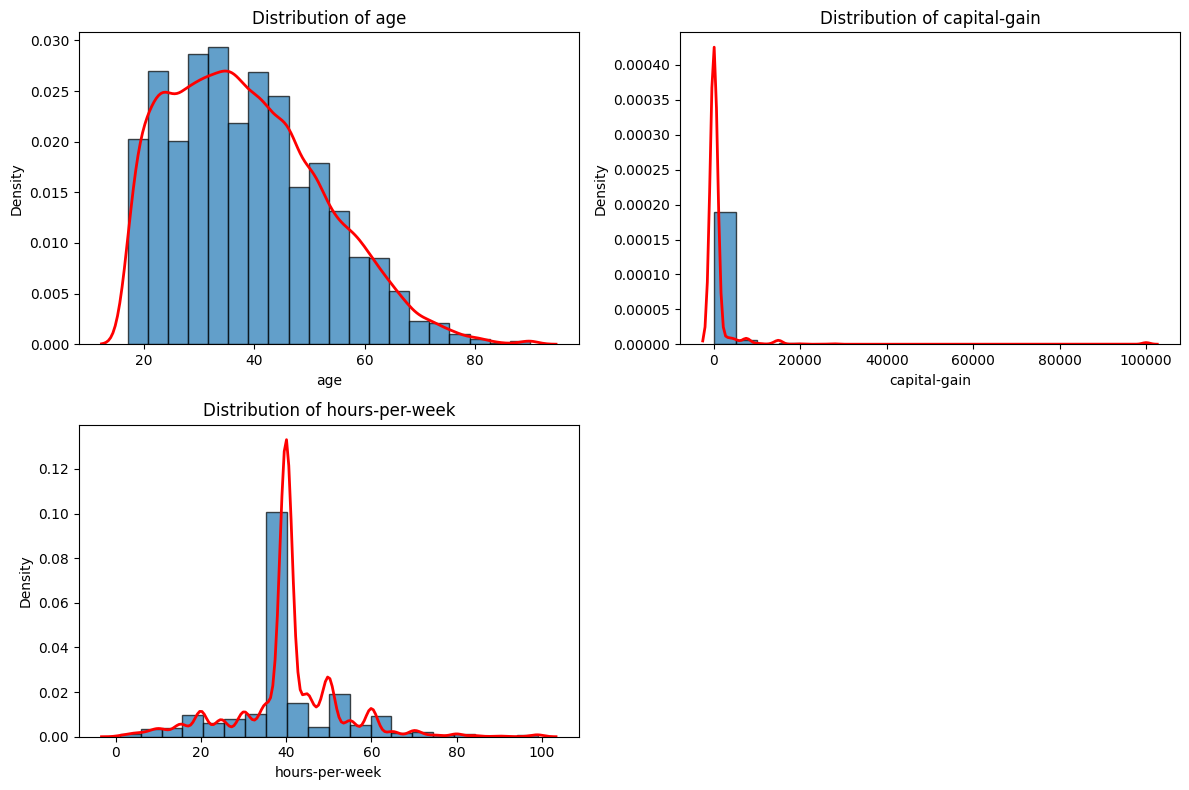

In [30]:
numeric_columns = ['age', 'capital-gain', 'hours-per-week']
plt.figure(figsize=(12, 8))

for i in range(len(numeric_columns)):
    plt.subplot(2, 2, i + 1)
    plt.hist(data[numeric_columns[i]], bins=20, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(data[numeric_columns[i]], color='red', linewidth=2)
    plt.title(f'Distribution of {numeric_columns[i]}')
    plt.xlabel(numeric_columns[i])
    plt.ylabel('Density')

plt.tight_layout()

- Copy data to df variable for later plotting the comparision of before and after normalization scaling.

In [31]:
df = data.copy()

#### Does the data contain features with different scales? ####

- **Answer:** From the plot above, we can see that the data contain features with different scales. **capital-gain** even has a few outliers.

Through the plot observation, **age** seems a bit left skewed, **hours-per-week** has slightly normal distribution. Meanwhile, **capital-gain** is highly left skewed with big outlier value.

#### Which normalization techniques should be applied? Why? ####

- **Answer:** Different features will be applied different normalization techniques, I'll answer for each features below

- For **hours-per-week** and **age**, I used **Z-score normalization**. 
- **Reason:** It is used to transform data into a standard normal distribution, ensuring that all features are on the same scale. This process helps to avoid the dominance of certain features over others due to differences in their scales, which can significantly impact the performance of machine learning models. [[3](https://www.geeksforgeeks.org/z-score-normalization-definition-and-examples/#why-zscore-normalization-is-necessary)] . These features is just a bit skewed, really close to normal distribution so **Z-score** is the best choice.

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $ x $ is the value of the data point,
- $ \mu $ is the mean of the data,
- $ \sigma $ is the standard deviation of the data

In [32]:
def z_score(data, feature):
    mean = np.mean(data[feature])
    std = np.std(data[feature])
    if std == 0:
        return [0 for _ in data[feature]]
    return [(x - mean) / std for x in data[feature]]

data['hours-per-week'] = z_score(data, 'hours-per-week')
data['age'] = z_score(data, 'age')

- For **capital-gain** , I used **Min-max scaling**. 
- **Reason:** **Z-score** is a good choice when the data follows a normal distribution or a distribution somewhat like a normal distribution. [[4](https://developers.google.com/machine-learning/crash-course/numerical-data/normalization#:~:text=Z%2Dscore%20is%20a%20good,but%20still%20contain%20extreme%20outliers.)]. But **capital-gain** is highly skewed-left and it has outliers from the right so **Z-score** is not suitable. Besides, there is **Robust scaling** method that can handle outliers, but since it calculate median and quartiles, most of the value may be converted to 0 because the distribution is mostly in bin 0, the other different values have low frequency. So **Robust scaling** is not suitable either. Hence, I'll use **Min-max scaling**, it is able to work if the data has few outliers, scaling it to range [0, 1].

$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

Where:
- $ x $ is the original value,
- $ \min(x) $ is the minimum value of the feature,
- $ \max(x) $ is the maximum value of the feature,
- $ x' $ is the scaled value.

In [33]:
def min_max_scaling(data, feature):
    min = np.min(data[feature])
    max = np.max(data[feature])
    return [(x - min)/(max - min) for x in data[feature]]

data['capital-gain'] = min_max_scaling(data, 'capital-gain')

#### Comparision of distribution before and after normalization: ####

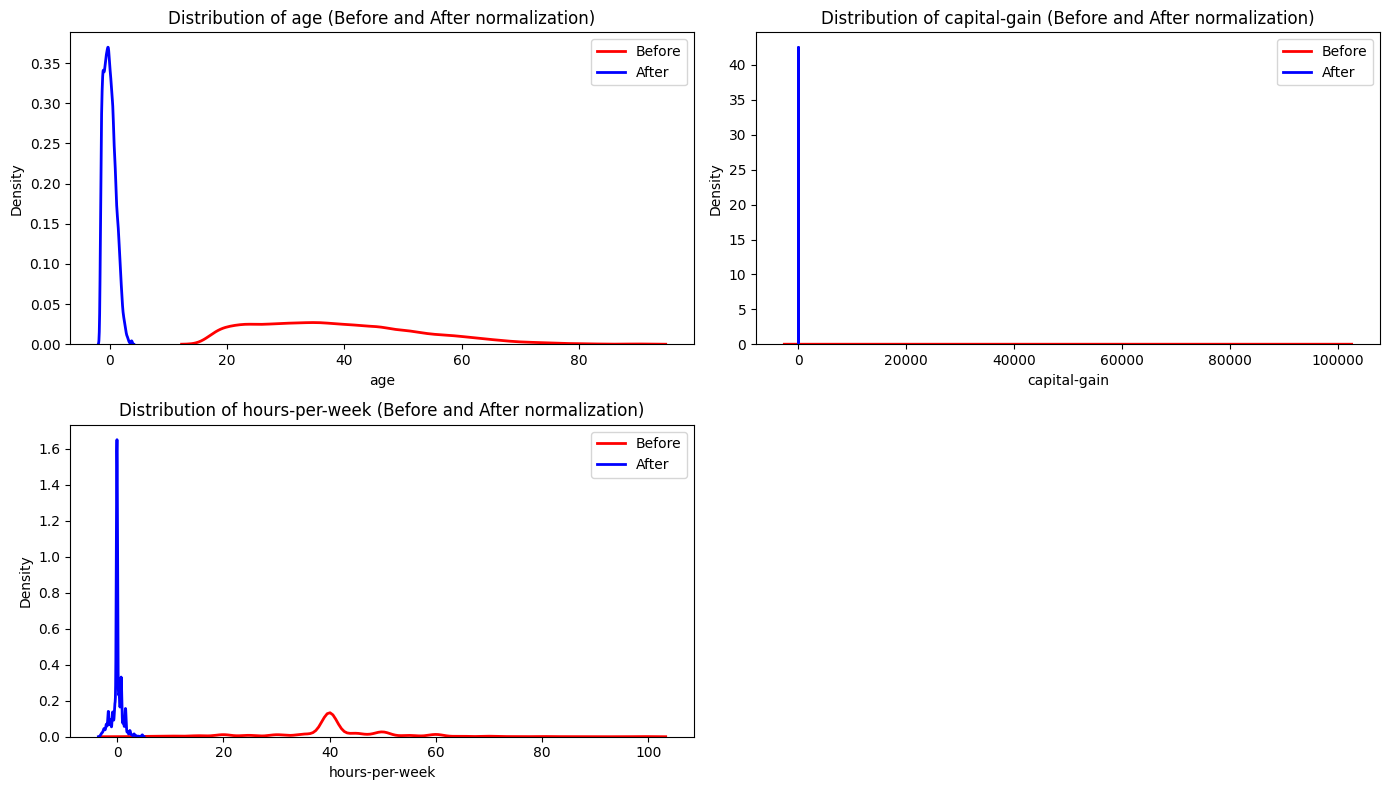

In [34]:
numeric_columns = ['age', 'capital-gain', 'hours-per-week']
plt.figure(figsize=(14, 8))


for i in range(len(numeric_columns)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(df[numeric_columns[i]], color='red', linewidth=2, label='Before')
    sns.kdeplot(data[numeric_columns[i]], color='blue', linewidth=2, label='After')
    plt.title(f'Distribution of {numeric_columns[i]} (Before and After normalization)')
    plt.xlabel(numeric_columns[i])
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

The data now seems to be normally distributed.

#### The data after normalization: ####

In [35]:
data

,age,education,marital-status,occupation,relationship,capital-gain,hours-per-week,income
0,0.025724,Bachelors,Never-married,Adm-clerical,Not-in-family,0.021740,-0.034304,<=50K
1,0.828125,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0.000000,-2.213335,<=50K
2,-0.047221,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0.000000,-0.034304,<=50K
3,1.046961,11th,Married-civ-spouse,Handlers-cleaners,Husband,0.000000,-0.034304,<=50K
4,-0.776676,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0.000000,-0.034304,<=50K
...,...,...,...,...,...,...,...,...
48837,0.025724,Bachelors,Divorced,Prof-specialty,Not-in-family,0.000000,-0.357123,<=50K
48838,1.849362,HS-grad,Widowed,Prof-specialty,Other-relative,0.000000,-0.034304,<=50K
48839,-0.047221,Bachelors,Married-civ-spouse,Prof-specialty,Husband,0.000000,0.772745,<=50K
48840,0.390452,Bachelors,Divorced,Adm-clerical,Own-child,0.054551,-0.034304,<=50K


## 4. Data Discretization:

#### Which techniques should be applied for discretization? ####

- **Answer:** I use **Equal-width binning**.
- **Reason:** Because **Equal-width binning** is a simple approach, that helps to handle large data and outliers by converting data into fewers categories, and extreme outliers will be grouped into the last bin.

In [36]:
n_bins = 5
age_bins = np.linspace(data['age'].min(), data['age'].max(), n_bins + 1)
capital_gain_bins = np.linspace(data['capital-gain'].min(), data['capital-gain'].max(), n_bins + 1)
hours_per_week_bins = np.linspace(data['hours-per-week'].min(), data['hours-per-week'].max(), n_bins + 1)

data['age'] = np.digitize(data['age'], age_bins, right=True)
data['capital-gain'] = np.digitize(data['capital-gain'], capital_gain_bins, right=True)
data['hours-per-week'] = np.digitize(data['hours-per-week'], hours_per_week_bins, right=True)

#### The data after binning: ####

In [37]:
data

,age,education,marital-status,occupation,relationship,capital-gain,hours-per-week,income
0,2,Bachelors,Never-married,Adm-clerical,Not-in-family,1,2,<=50K
1,3,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,1,<=50K
2,2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,2,<=50K
3,3,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,2,<=50K
4,1,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,2,<=50K
...,...,...,...,...,...,...,...,...
48837,2,Bachelors,Divorced,Prof-specialty,Not-in-family,0,2,<=50K
48838,4,HS-grad,Widowed,Prof-specialty,Other-relative,0,2,<=50K
48839,2,Bachelors,Married-civ-spouse,Prof-specialty,Husband,0,3,<=50K
48840,2,Bachelors,Divorced,Adm-clerical,Own-child,1,2,<=50K


#### Plot the bins: ####

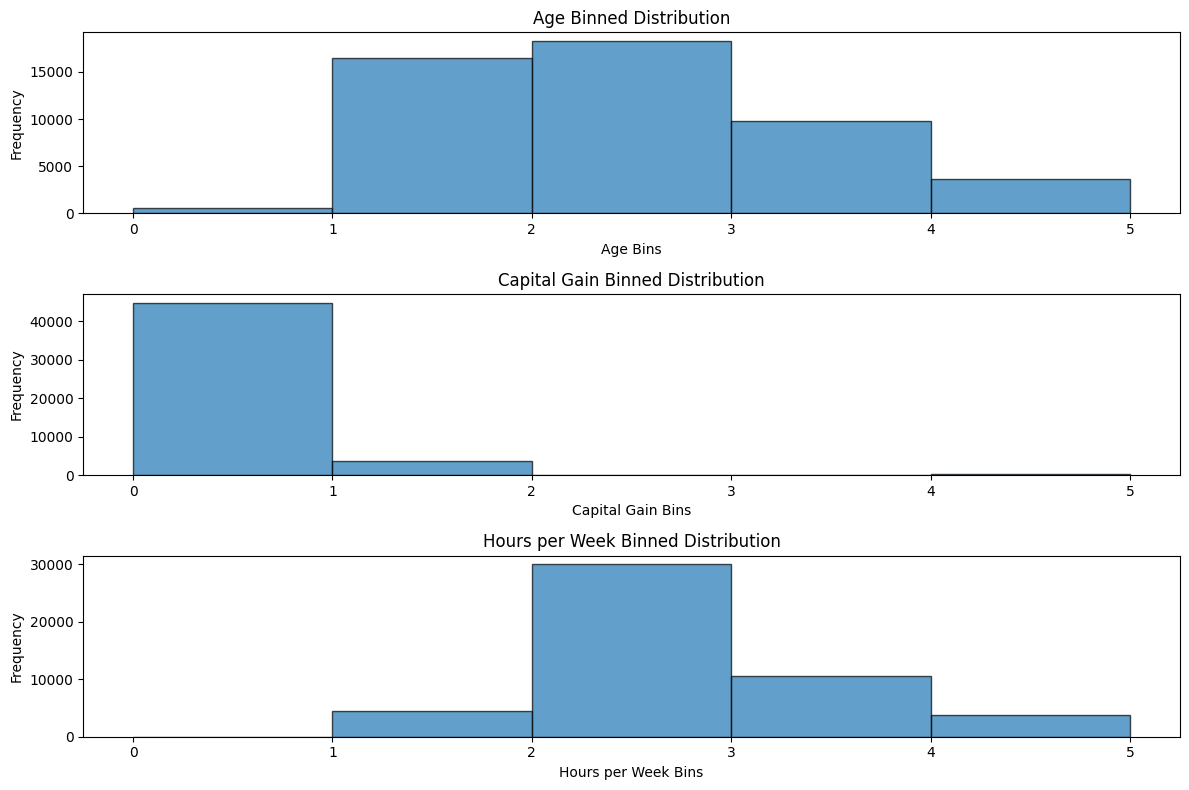

In [38]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(data['age'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.title('Age Binned Distribution')
plt.xlabel('Age Bins')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(data['capital-gain'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.title('Capital Gain Binned Distribution')
plt.xlabel('Capital Gain Bins')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(data['hours-per-week'], bins=n_bins, edgecolor='black', alpha=0.7)
plt.title('Hours per Week Binned Distribution')
plt.xlabel('Hours per Week Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. References:

[1] https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V , Accessed date: November 7th, 2024.

[2] https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v , Accessed date: November 7th, 2024.

[3] https://www.geeksforgeeks.org/z-score-normalization-definition-and-examples/ , Accessed date: November 7th, 2024.

[4] https://developers.google.com/machine-learning/crash-course/numerical-data/normalization#:~:text=Z%2Dscore%20is%20a%20good,but%20still%20contain%20extreme%20outliers. , Accessed date: November 7th, 2024.